## Method #1 VOD Logit Benchmark

In [2]:
import pandas as pd
import numpy as np

import scipy
import statsmodels.formula.api as smf
import statistics as st 
import pandas as pd
import matplotlib.pyplot as plt
from time import time

In [436]:
cd

/Users/karatechop


In [437]:
cd /Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022\ \(CSV\)

/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)


In [438]:
df = pd.read_csv('working_main_expanded.csv')
df.columns

Index(['date', 'time', 'sex', 'race', 'type', 'duration', 'agency', 'city',
       'lat', 'lon', 'wave', 'sunsettime', 'mins_sunset', 'mins_stop_time',
       'mins_after_sunset', 'day_in_year'],
      dtype='object')

In [ ]:
df = df[['']]

In [ ]:
print(working_main.shape)
# one_hot_encoded_main = pd.get_dummies(working_main, columns = ['sex','race'],drop=False,prefix='') #https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
VOD = df[df['type']!='Non-Moving'][['datetime','race']]


In [ ]:
race_options = ['white','black','hispanic','asian','report_risk_groups','bipoc']


for race in race_options:
    formula = f"_black/african american ~ C({race}, Treatment(reference=0)) + perceivedage"
    log_reg = smf.logit(formula, data = df).fit()
    results = log_reg.summary()
    OR = pd.DataFrame(
        {
            "OR": log_reg.params,
            "Lower CI": log_reg.conf_int()[0],
            "Upper CI": log_reg.conf_int()[1],
        },
    )
    OR = np.exp(OR)
    
    print(f"\n\n{race} model (LARGE)\n{OR}\n\n\n{results}\n\n\n\n\n\n\n\n\n")

## Method #2 Proportions Before/After Sunset

In [486]:
cd

/Users/karatechop


In [437]:
cd /Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022\ \(CSV\)

/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)


In [438]:
df = pd.read_csv('working_main_expanded.csv')
df.columns

Index(['date', 'time', 'sex', 'race', 'type', 'duration', 'agency', 'city',
       'lat', 'lon', 'wave', 'sunsettime', 'mins_sunset', 'mins_stop_time',
       'mins_after_sunset', 'day_in_year'],
      dtype='object')

In [469]:
df = pd.read_csv('working_main_expanded.csv')

In [470]:
df.columns

Index(['date', 'time', 'sex', 'race', 'type', 'duration', 'agency', 'city',
       'lat', 'lon', 'wave', 'sunsettime', 'mins_sunset', 'mins_stop_time',
       'mins_after_sunset', 'day_in_year'],
      dtype='object')

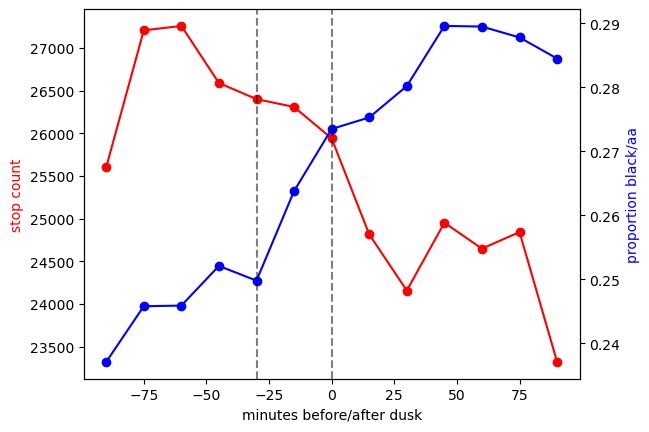

In [334]:
# fig,ax=plt.subplots()

# ax.plot(prop_table['after_sunset_category'],prop_table['total_stops'],c='red',label='reported stops',marker="o")
# ax.set_xlabel("minutes before/after dusk")
# ax.set_ylabel('stop count',c='red')


# ax2=ax.twinx()
# ax2.plot(prop_table['after_sunset_category'],prop_table['prop'],c="blue",marker="o")
# ax2.set_ylabel("proportion black/aa",color="blue")
# plt.axvline(x = 0,c='black',alpha=.5,linestyle='dashed')
# plt.axvline(x = -30,c='black',alpha=.5,linestyle='dashed')

# plt.show()

# # https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/




# # save the plot as a file
# # fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
# #             format='jpeg',
# #             dpi=100,
# #             bbox_inches='tight')

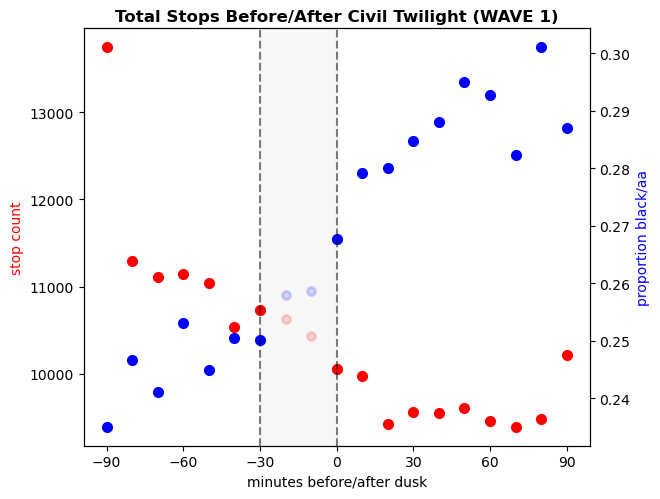

In [485]:
df = df[['date','wave','race','mins_stop_time','mins_sunset','mins_after_sunset','type','city']]
df1_bw = df[(df['mins_after_sunset'] <= 96) &\
            (df['mins_after_sunset'] >= -96) &\
            (df['city']=='Los Angeles') &\
            (df['type']=='Moving')][['date','wave','race','mins_stop_time','mins_sunset','mins_after_sunset']]

df1_bw['after_sunset_category'] = [min(np.arange(-90,91,10), key=lambda x:abs(x-i)) for i in df1_bw['mins_after_sunset']]
prop_table = df1_bw.groupby('after_sunset_category',as_index=False).agg('count')[['after_sunset_category','race']]
prop_table['black_aa'] = df1_bw[df1_bw['race']=='black/african american'].groupby('after_sunset_category',as_index=False)\
                                                                   .agg('count')[['after_sunset_category','race']]\
                                                                   .rename(columns={'race':'black_aa'})['black_aa']
prop_table['prop_black_aa'] = round(prop_table['black_aa']/prop_table['race'],4)

prop_table = prop_table.sort_values(by='after_sunset_category')\
                       .reset_index(drop=True)\
                       .rename(columns={'race':'total_stops',
                                        'black_aa':'black_aa_stops',
                                        'prop_black_aa':'prop'})

prop_table_pre = prop_table[(prop_table['after_sunset_category']<= -30)]
prop_table_post = prop_table[(prop_table['after_sunset_category']>= -1)]
prop_table_dusk = prop_table[(prop_table['after_sunset_category']>= -30) & (prop_table['after_sunset_category']<= 0)]


fig,ax=plt.subplots()

ax.scatter(prop_table_pre['after_sunset_category'],prop_table_pre['total_stops'],linewidth=2,c='red',label='reported stops',marker="o")
ax.scatter(prop_table_post['after_sunset_category'],prop_table_post['total_stops'],linewidth=2,c='red',label='reported stops',marker="o")
ax.scatter(prop_table_dusk['after_sunset_category'],prop_table_dusk['total_stops'],linewidth=2,c='red',alpha=.15,marker="o")

ax.set_xlabel("minutes before/after dusk")
ax.set_ylabel('stop count',c='red')


ax2=ax.twinx()
ax2.scatter(prop_table_pre['after_sunset_category'],prop_table_pre['prop'],linewidth=2,c="blue",marker="o")
ax2.scatter(prop_table_post['after_sunset_category'],prop_table_post['prop'],linewidth=2,c="blue",marker="o")
ax2.scatter(prop_table_dusk['after_sunset_category'],prop_table_dusk['prop'],linewidth=2,c='blue',alpha=.15,marker="o")

ax2.set_ylabel("proportion black/aa",color="blue")


plt.xticks(np.arange(-90,95,30))
plt.axvline(x = 0,c='black',alpha=.5,linestyle='dashed')
plt.axvline(x = -30,c='black',alpha=.5,linestyle='dashed')
plt.axvspan(-30, 0, color='black', alpha=0.03)

plt.title('Total Stops Before/After Civil Twilight (WAVE 1)',weight='semibold',pad=5)
plt.tight_layout(pad=0, w_pad=2, h_pad=2)

plt.show()






# save the plot as a file
# fig.savefig('Total Stops vs Proportion Black Civil Twilight (WAVE 1).jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')